In [1]:
%matplotlib inline

import json
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
from dateutil.parser import parse as parse_date

# Data

In [2]:
with open(os.path.join(os.pardir, "data", "wikileaks.json")) as fp:
    tweets = json.load(fp)
    for tweet in tweets:
        tweet['created_at'] = parse_date(tweet['created_at'])

        
df = pd.DataFrame(tweets)
df['created_at'] = pd.DataFrame(df['created_at'])
df.head()

,created_at,is_quote_status,n_chars,n_favorites,n_hashtags,n_mentions,n_retweets,n_urls,retweets_fav_ratio,source,tweet_id,tweet_text
0,2016-12-13 00:27:29+00:00,False,134,788,0,1,627,1,0.443110,"<a href=""https://about.twitter.com/products/tw...",808468346605883394,“We are inevitably the mouthpiece for whatever...
1,2016-12-12 23:48:33+00:00,False,80,3476,1,0,2972,0,0.460918,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",808458549844201472,How to get promoted to the New York Times #Pod...
2,2016-12-12 23:24:43+00:00,False,120,926,0,0,740,2,0.444178,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",808452552677330948,Sweden's most influential daily on extraditing...
3,2016-12-12 23:21:57+00:00,True,90,1058,0,1,835,1,0.441099,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",808451854430511104,"2012 Presidential candidate @RonPaul on CIA, S..."
4,2016-12-12 23:02:22+00:00,False,140,0,1,1,317,0,1.000000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",808446928572841984,RT @PardonManning: New action: Call the White ...


In [3]:
df.created_at.min()  # First tweet in the data

Timestamp('2016-04-19 14:01:53+0000', tz='UTC')

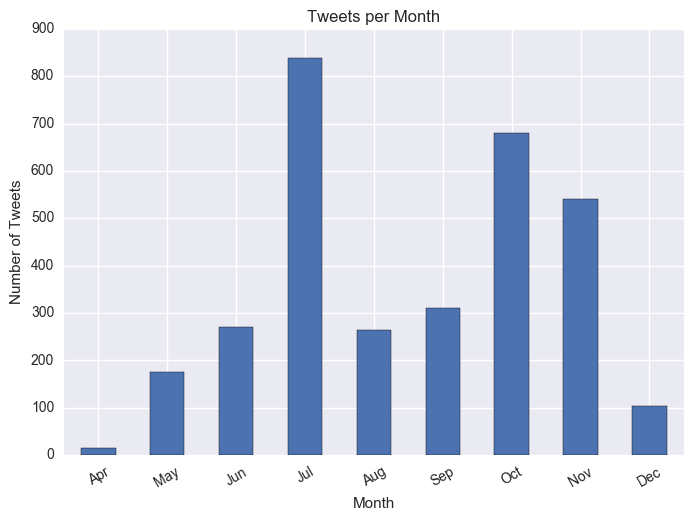

In [4]:
df.groupby(df.created_at.dt.month)['tweet_text'].count().plot(kind='bar')
plt.title('Tweets per Month')
plt.ylabel('Number of Tweets')
plt.xlabel('Month')
plt.axes().set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug',
                    'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(rotation=30);

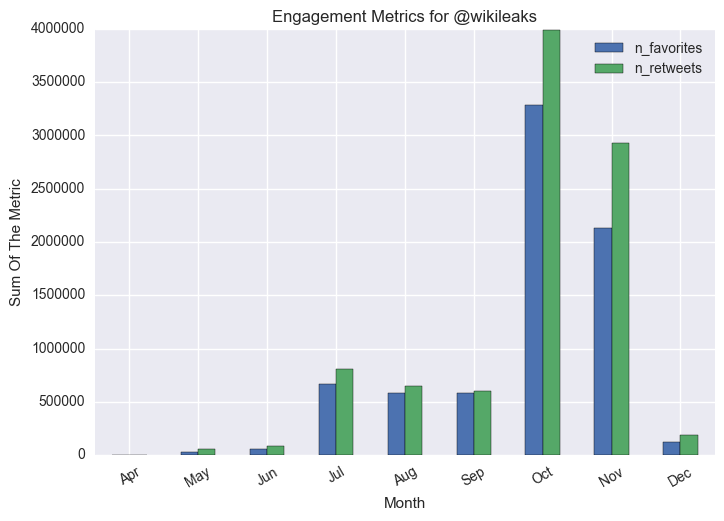

In [5]:
fig, ax = plt.subplots()
engage_df = df.groupby(df.created_at.dt.month)['n_favorites', 'n_retweets'].sum()
engage_df.plot(kind='bar', ax=ax);
plt.title('Engagement Metrics for @wikileaks')
plt.ylabel('Sum Of The Metric')
plt.xlabel('Month')
ax.set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug',
                    'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(rotation=30);

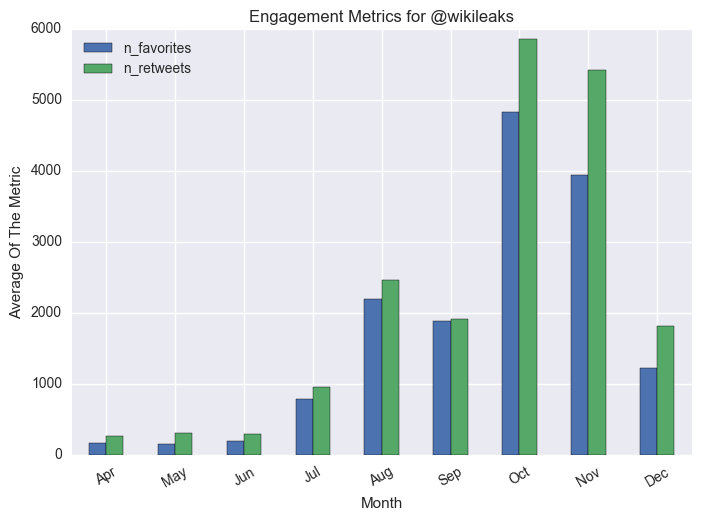

In [6]:
fig, ax = plt.subplots()
engage_df = df.groupby(df.created_at.dt.month)['n_favorites', 'n_retweets'].mean()
engage_df.plot(kind='bar', ax=ax);
plt.title('Engagement Metrics for @wikileaks')
plt.ylabel('Average Of The Metric')
plt.xlabel('Month')
ax.set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug',
                    'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(rotation=30);

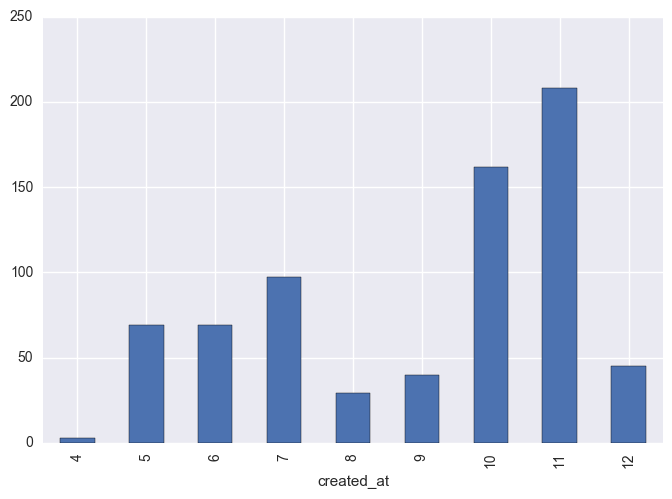

In [7]:
sub_df = df[df.n_favorites == 0]
sub_df.groupby(df.created_at.dt.month)['n_favorites'].count().plot(kind='bar');

In [8]:
(df.n_retweets == 0).sum()

1

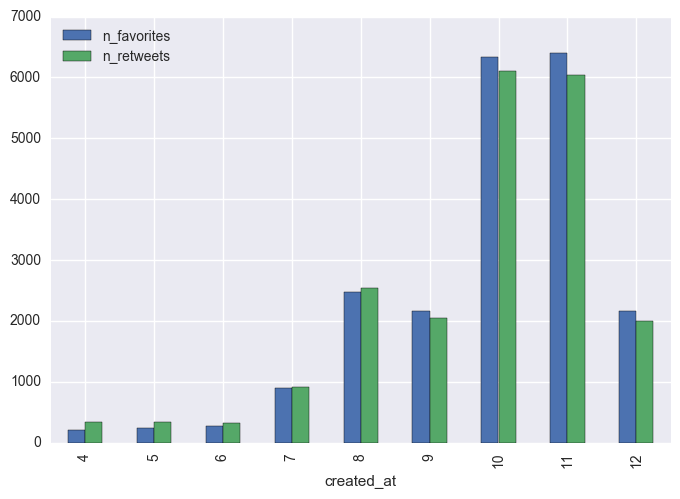

In [9]:
sub_df = df[(df.n_retweets > 0) & (df.n_favorites > 0)].copy()
sub_df.groupby(sub_df.created_at.dt.month)['n_favorites', 'n_retweets'].mean().plot(kind='bar');

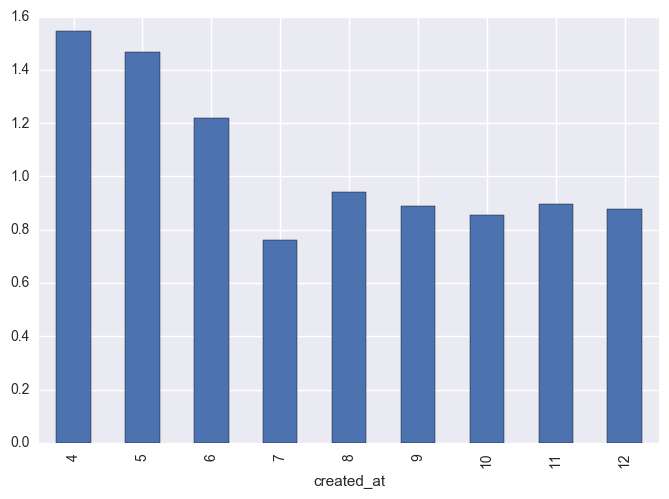

In [10]:
sub_df['ratio'] = (sub_df['n_retweets'] / sub_df['n_favorites'])
sub_df.groupby(sub_df.created_at.dt.month)['ratio'].mean().plot(kind='bar');

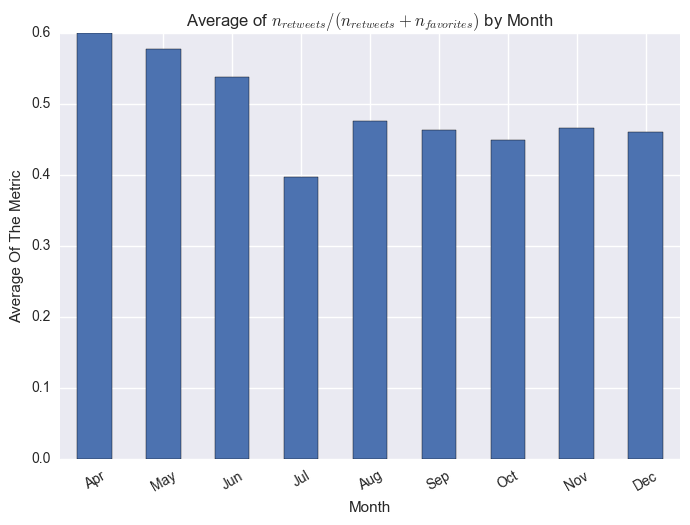

In [11]:
sub_df['p_retweet'] = (sub_df['n_retweets'] / (sub_df['n_retweets'] + sub_df['n_favorites']))
sub_df.groupby(sub_df.created_at.dt.month)['p_retweet'].mean().plot(kind='bar');

plt.title('Average of $n_{retweets} / (n_{retweets} + n_{favorites})$ by Month')
plt.ylabel('Average Of The Metric')
plt.xlabel('Month')
plt.axes().set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug',
                    'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(rotation=30);

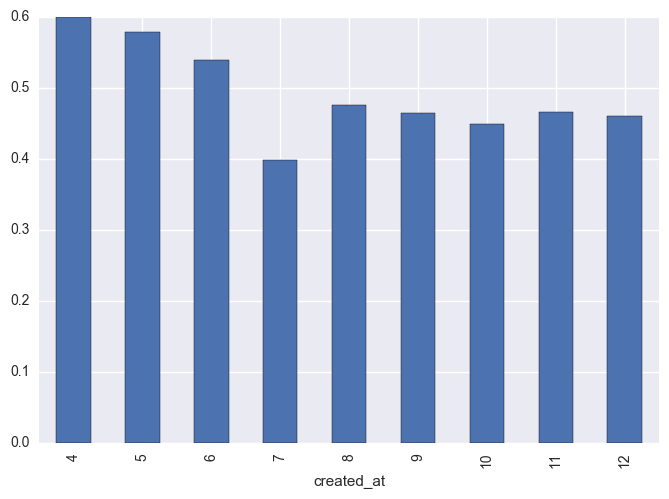

In [12]:
sub_df['p_retweet'] = (sub_df['n_retweets'] / (sub_df['n_retweets'] + sub_df['n_favorites']))
sub_df.groupby(sub_df.created_at.dt.month)['p_retweet'].mean().plot(kind='bar');

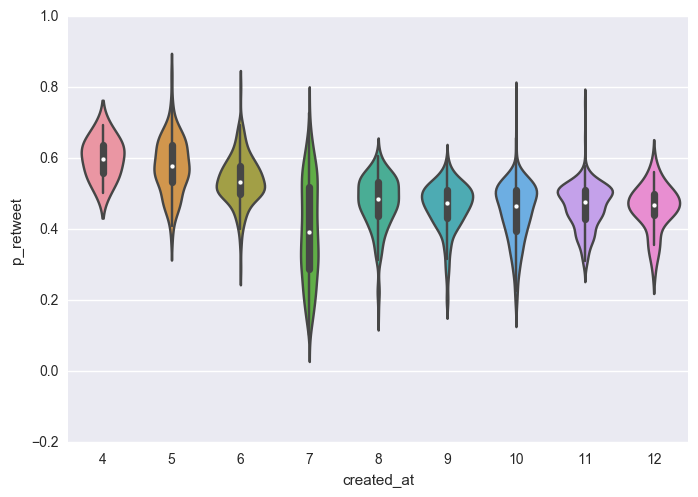

In [13]:
sns.violinplot(sub_df.created_at.dt.month, sub_df.p_retweet);

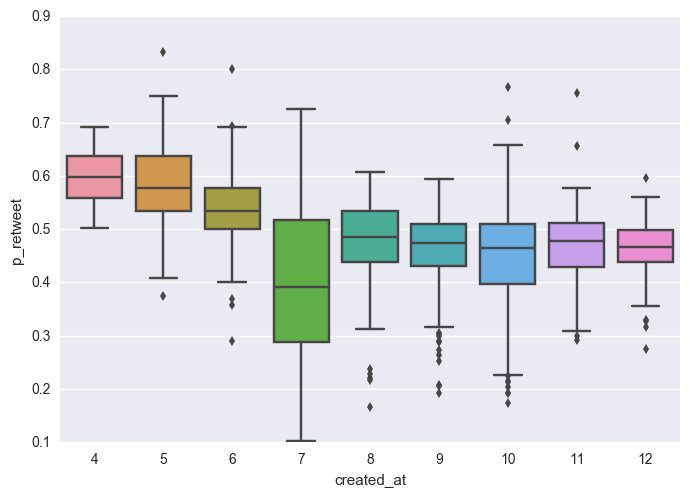

In [14]:
sns.boxplot(sub_df.created_at.dt.month, sub_df.p_retweet);

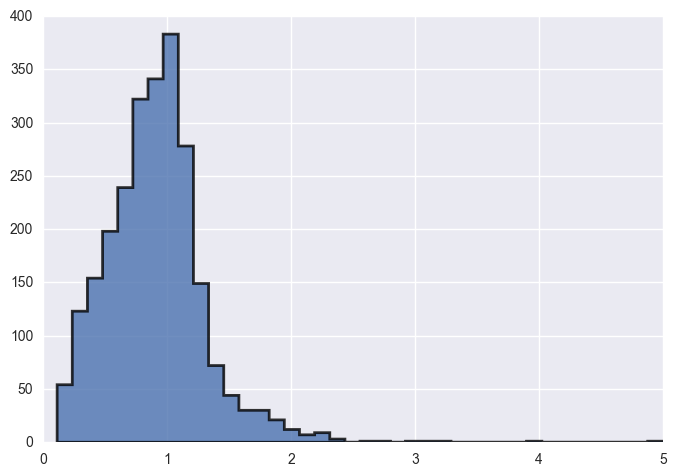

In [15]:
sub_df.ratio.hist(bins=40, histtype='stepfilled', lw=2, alpha=0.8);

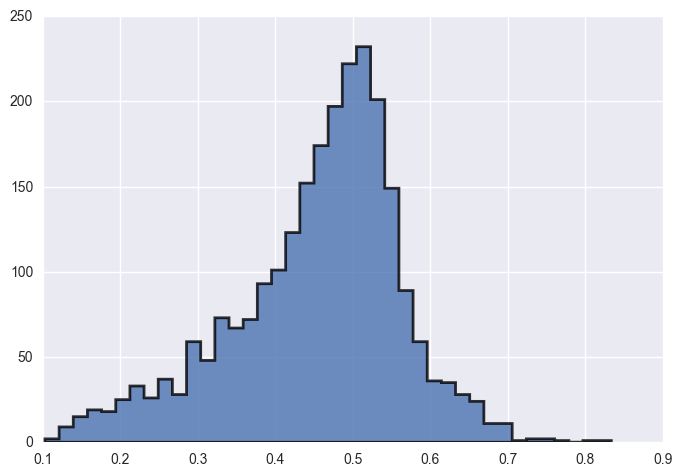

In [18]:
sub_df.p_retweet.hist(bins=40, histtype='stepfilled', lw=2, alpha=0.8);

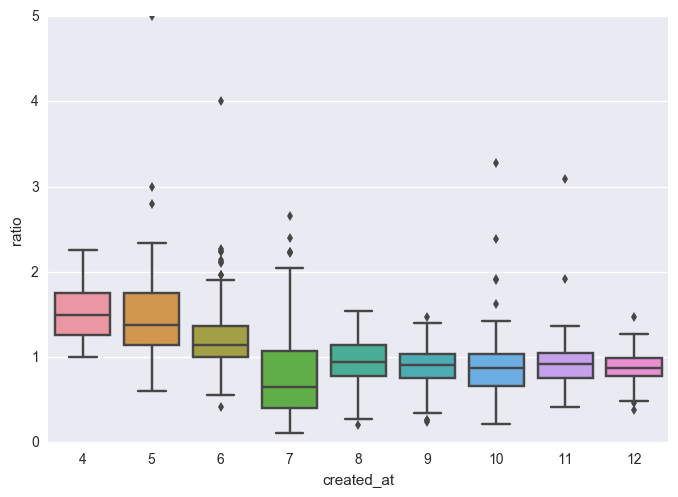

In [16]:
sns.boxplot(sub_df.created_at.dt.month, sub_df.ratio);

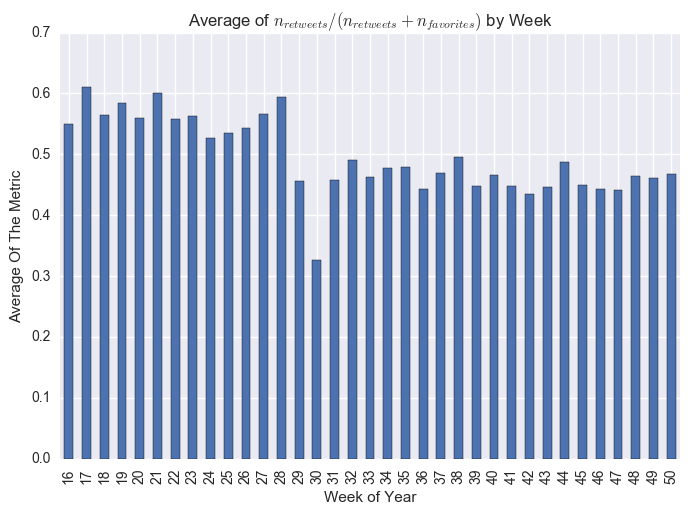

In [17]:
sub_df['p_retweet'] = (sub_df['n_retweets'] / (sub_df['n_retweets'] + sub_df['n_favorites']))
sub_df.groupby(sub_df.created_at.dt.weekofyear)['p_retweet'].mean().plot(kind='bar');
plt.title('Average of $n_{retweets} / (n_{retweets} + n_{favorites})$ by Week')
plt.ylabel('Average Of The Metric')
plt.xlabel('Week of Year');